In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


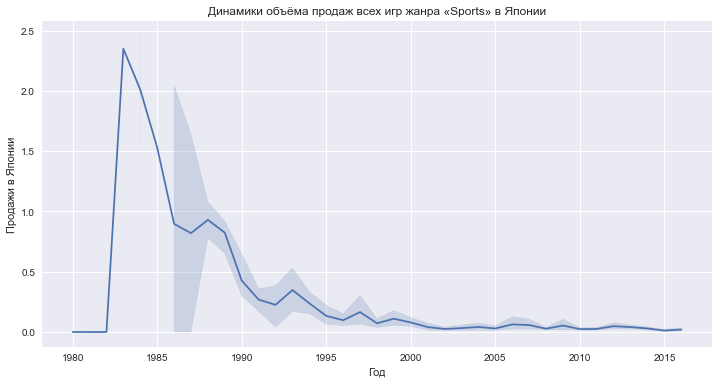

In [5]:
# Задание 1
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df['Genre'] == 'Sports']
sns.lineplot(data=data, x='Year', y='JP_Sales', ax=ax)

ax.set_title('Динамики объёма продаж всех игр жанра «Sports» в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи в Японии')

plt.show()

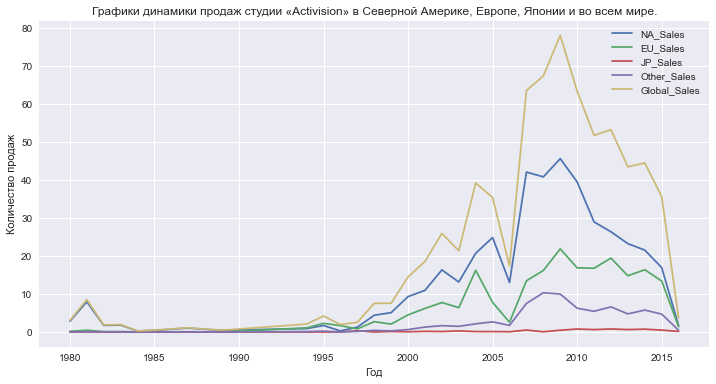

In [50]:
# Задача 2
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

fig, ax = plt.subplots(figsize=(12, 6))

for i, elem in enumerate(data.columns):
    sns.lineplot(data=data, x='Year', y=elem, label=elem)

ax.set_title('Графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.')
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж')

ax.legend()

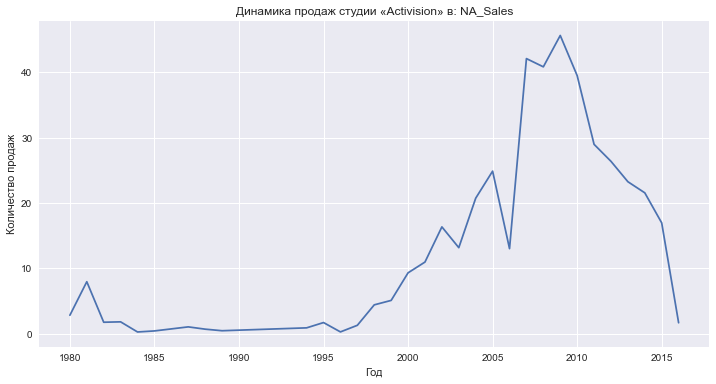

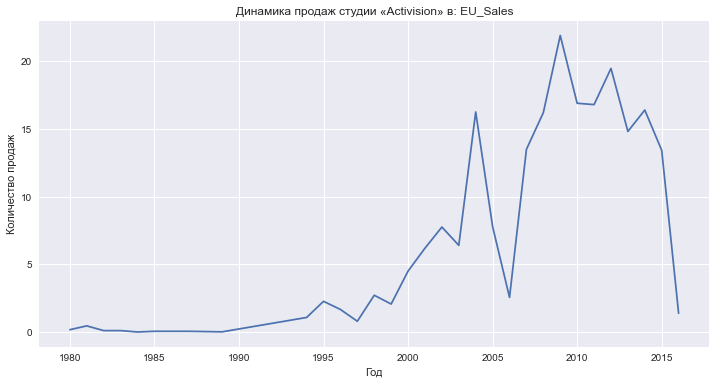

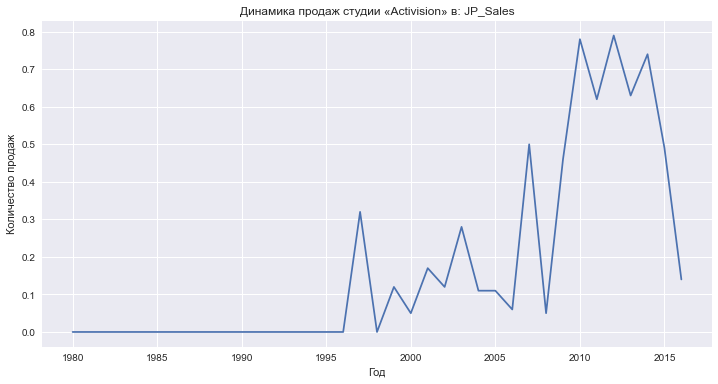

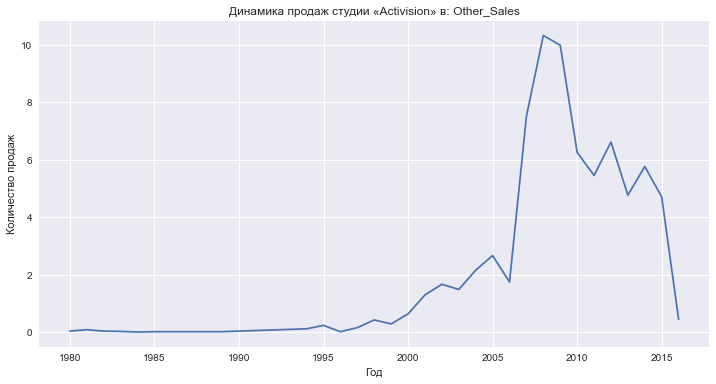

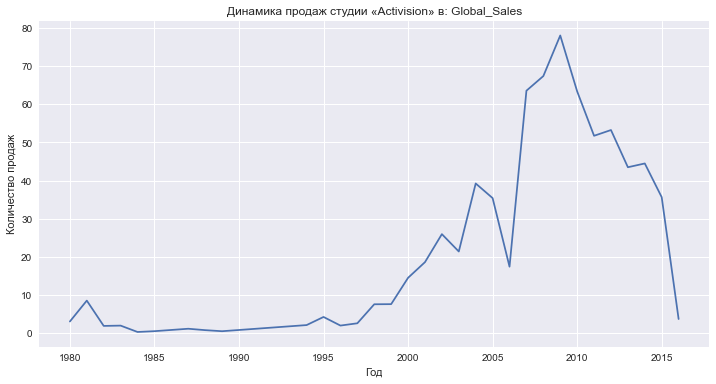

In [83]:
# Задача 3
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

for i, elem in enumerate(data.columns):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=data, x='Year', y=elem)
    ax.set_title('Динамика продаж студии «Activision» в: ' + elem)
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество продаж')

C:\Users\Amaim\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amaim\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amaim\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amaim\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amaim\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amaim\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

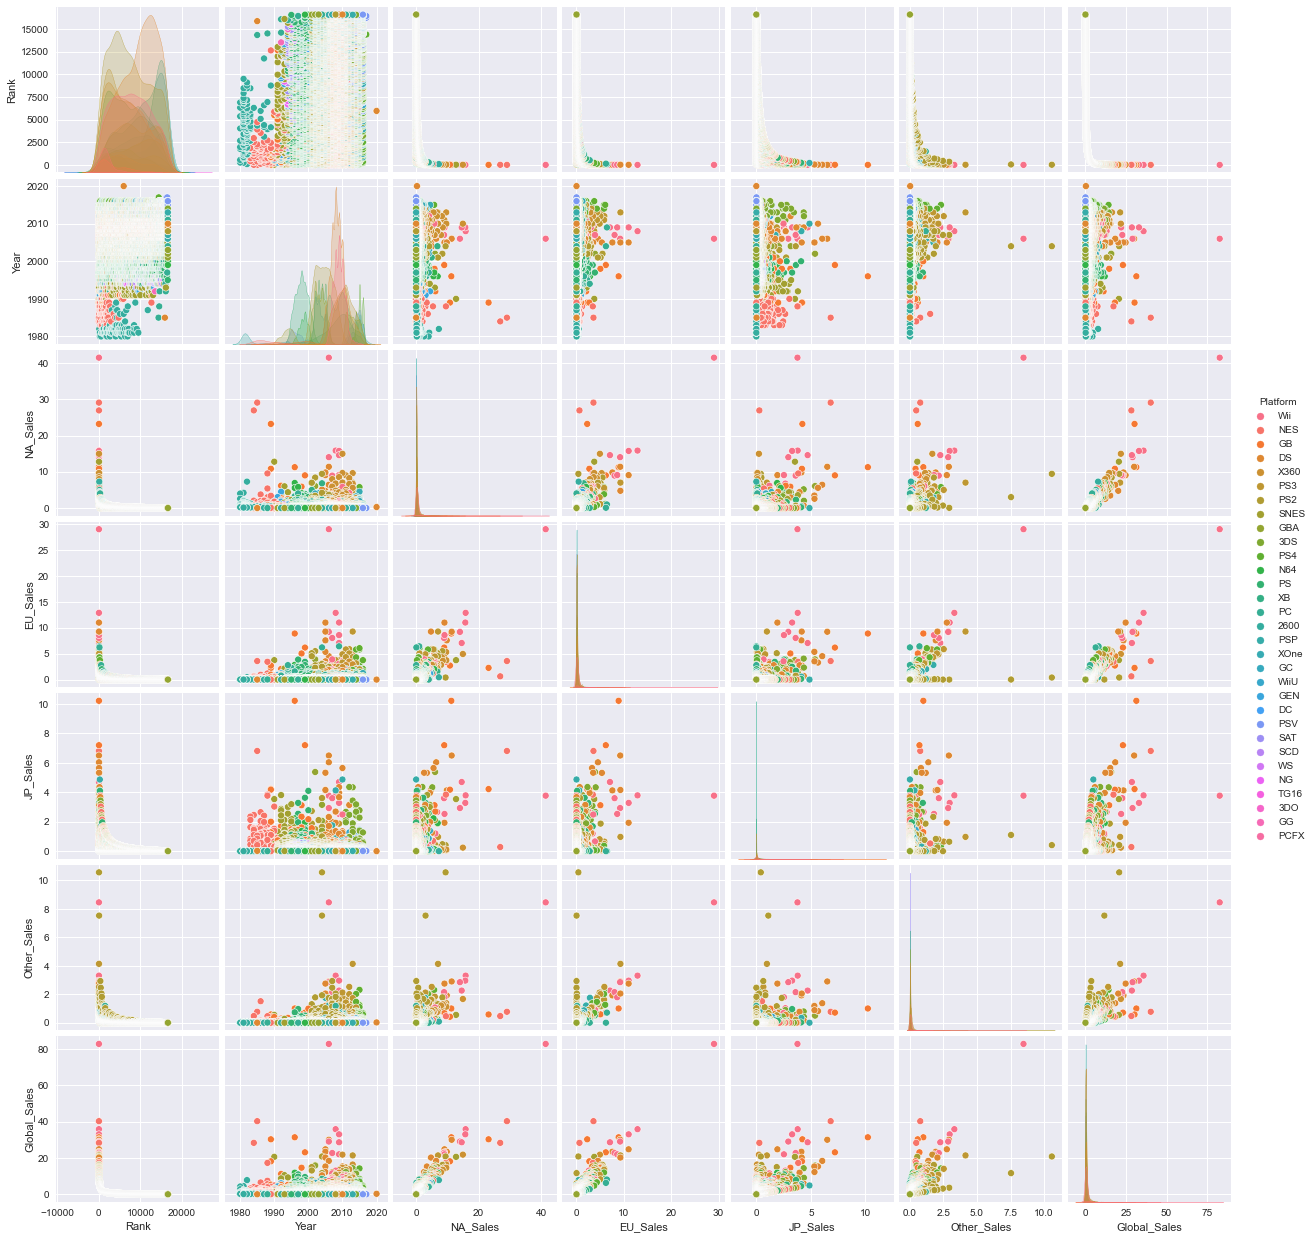

In [56]:
# Задача 4
sns.pairplot(df, hue='Platform')

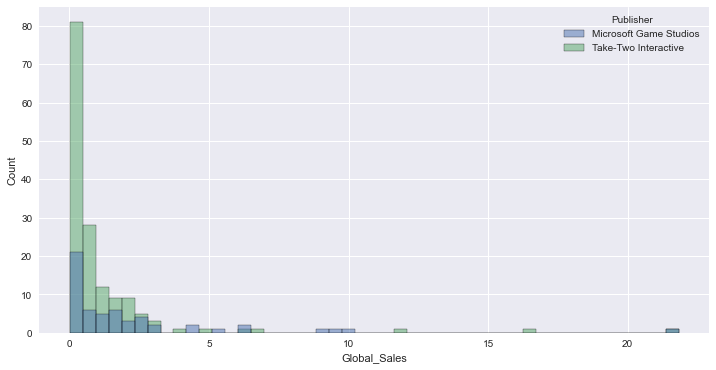

In [87]:
# Задача 5
fig, ax = plt.subplots(figsize=(12, 6))

data = df[(df['Publisher'].isin(['Microsoft Game Studios', 'Take-Two Interactive'])) & (df['Year'] >= 2010)]

sns.histplot(data=data, x='Global_Sales', hue='Publisher', alpha=0.5, ax=ax)

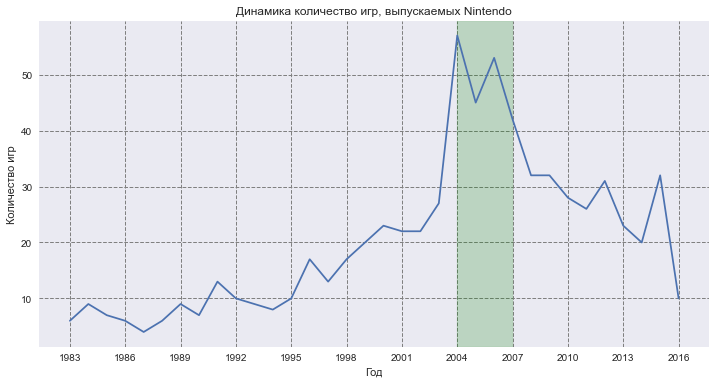

In [95]:
# Задача 6
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df['Publisher'] == 'Nintendo'].groupby('Year').count()['Name'].reset_index()

sns.lineplot(data=data, x='Year', y='Name')
ax.set_xticks(list(range(data['Year'].astype('int64').min(), data['Year'].astype('int64').max(), 3)) + [data['Year'].astype('int64').max()])
ax.axvspan(xmin=data[data['Name'] > 35].iloc[0, 0], xmax=data[data['Name'] > 35].iloc[-1, 0], color='green', alpha=0.2)
ax.grid(linewidth=1, color='gray', linestyle='--')
ax.set_title('Динамика количество игр, выпускаемых Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')
plt.show()

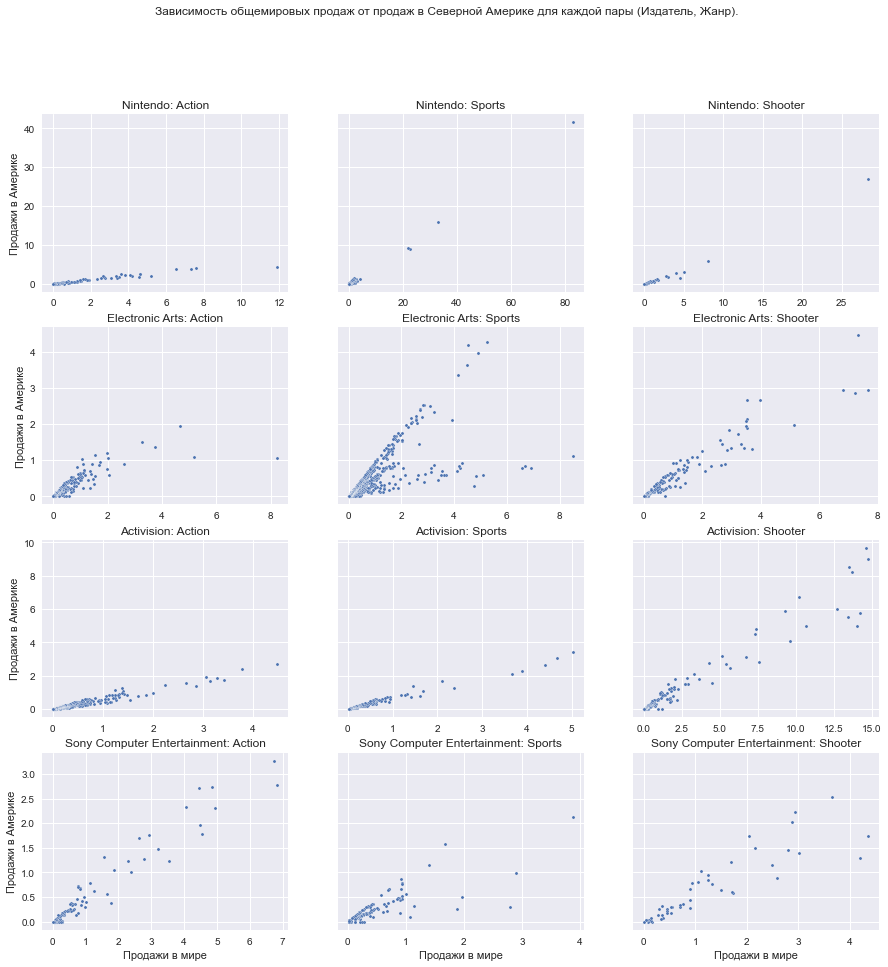

In [127]:
# Задача 7
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), sharey='row')

genres = ['Action', 'Sports', 'Shooter']
publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment']

fig.suptitle('Зависимость общемировых продаж от продаж в Северной Америке для каждой пары (Издатель, Жанр).')

for i in range(len(publishers)):
    for j in range(len(genres)):
        sales = df[(df['Publisher'] == publishers[i]) & (df['Genre'] == genres[j])]
        sns.scatterplot(data=sales, x='Global_Sales', y='NA_Sales', s=10, ax=ax[i][j])
        
        ax[i][j].set_title(publishers[i] + ': ' + genres[j])
        if publishers[i]:
            ax[i][j].set_xlabel('')
        if publishers[i] == 'Sony Computer Entertainment':
            ax[i][j].set_xlabel('Продажи в мире')
        if genres[j] == 'Action':
            ax[i][j].set_ylabel('Продажи в Америке')